In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



Retrieve the Dataset from the CSV File

In [132]:
df = pd.read_csv("./dataset.csv")
pd.options.display.max_columns = None
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Data Exploration and Data Cleaning
1. Understand what each attribute does
2. Eliminate attributes that are not useful to my analysis

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Attributes to Eliminate Are
1. Unamed: 0: Potential error with indexing while importing the file
2. Liveness: There is no true way of testing whether or not a track is live since it is all recorded
3. Track_id: Not needed as other information such as track_name and album_name are better ways of identification


In [134]:
df = df.drop(columns=['Unnamed: 0', 'liveness','track_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

In [135]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,0.995000,243.372000,5.000000


In [136]:
df.nunique()

artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

In [137]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [138]:
df = df.dropna()
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [139]:
duplicates = df[df.duplicated()]
df_cleaned = df.drop_duplicates().copy()

In [140]:
df_cleaned_duplicate = df_cleaned[df_cleaned.duplicated()]
df_cleaned_duplicate

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre


Since There are no more values that are duplicated, I can proceed to Data Analysis

Top 10 Most Popular Songs

In [141]:
top_10_popular_song = df_cleaned.sort_values('popularity', ascending=False).head(10)
top_10_popular_song

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.238,131.121,4,dance
81051,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.238,131.121,4,pop
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.550,128.033,4,hip-hop
81210,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.304,128.040,4,pop
20008,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.304,128.040,4,dance
89411,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.850,124.980,4,reggaeton
30003,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.304,128.040,4,edm
68303,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.850,124.980,4,latino
67356,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.850,124.980,4,latin
88410,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.850,124.980,4,reggae


Many songs are seen mulyiple times? This is ok because many songs are cateogrized by many genre, thus leading to duplicates

In [142]:
top_10_least_popular_song = df_cleaned.sort_values('popularity').head(10)
top_10_least_popular_song

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre
24,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.6670,5,-4.831,0,0.0392,0.381000,0.000000,0.7540,97.988,4,acoustic
75032,Jim Brickman,Winter Chill,I'll Be Home For Christmas,0,225131,False,0.248,0.0657,0,-18.973,1,0.0318,0.968000,0.877000,0.0793,91.470,4,new-age
75031,Jim Brickman,Winter Chill,O Come O Come Emmanuel,0,177632,False,0.419,0.0724,7,-17.252,1,0.0360,0.980000,0.791000,0.2270,132.459,5,new-age
75049,George Winston,Best Christmas Playlist Ever 2022,Linus And Lucy,0,195893,False,0.289,0.5990,8,-12.626,1,0.0392,0.893000,0.814000,0.8040,165.914,4,new-age
75048,George Winston,The Very Best Christmas Songs 2022,Linus And Lucy,0,195893,False,0.289,0.5990,8,-12.626,1,0.0392,0.893000,0.814000,0.8040,165.914,4,new-age
75046,Mike Oldfield,Anthems for Witches 2022,"Tubular Bells - Opening Theme / From ""The Exor...",0,196680,False,0.325,0.2660,4,-16.968,0,0.0298,0.803000,0.000093,0.3850,147.198,3,new-age
75091,David Arkenstone,Winter Chill,O Holy Night,0,251346,False,0.323,0.1640,5,-16.185,1,0.0348,0.982000,0.927000,0.2450,74.747,3,new-age
75090,ICE-T,The Hip Hop Collection,New Jack Hustler (Nino's Theme),0,283306,True,0.830,0.8590,7,-9.213,1,0.1240,0.000956,0.000000,0.6530,109.319,4,new-age
75086,ICE-T,Rap Classics,6 'n the Mornin',0,224866,True,0.823,0.7450,5,-6.637,0,0.2470,0.002900,0.000333,0.5790,91.919,4,new-age
75085,Nicholas Gunn;Diana Miro,Armada Music - ADE 2022,Hold Me Tight,0,196553,False,0.648,0.5790,9,-9.346,1,0.0299,0.458000,0.283000,0.0400,119.981,4,new-age


Look for top 10 genre and compare its popularity, making sure we filter
1. If there are any that is too little for example less than 100

In [143]:
track_genre = df_cleaned.groupby('track_genre').size().sort_values()
track_genre

track_genre
romance        904
classical      933
german         961
dance          962
honky-tonk     981
              ... 
spanish       1000
sertanejo     1000
samba         1000
tango         1000
techno        1000
Length: 114, dtype: int64

Since looks like there are no outliers, all gfenre are considered

In [144]:
top_10_genre = df_cleaned.groupby('track_genre')['popularity'].median()
top_10_genre = top_10_genre.sort_values(ascending=False).head(10)
top_10_genre

track_genre
pop                  66.0
k-pop                60.0
pop-film             60.0
hip-hop              58.0
chill                57.0
metal                57.0
grunge               55.0
sad                  54.0
british              52.0
progressive-house    52.0
Name: popularity, dtype: float64

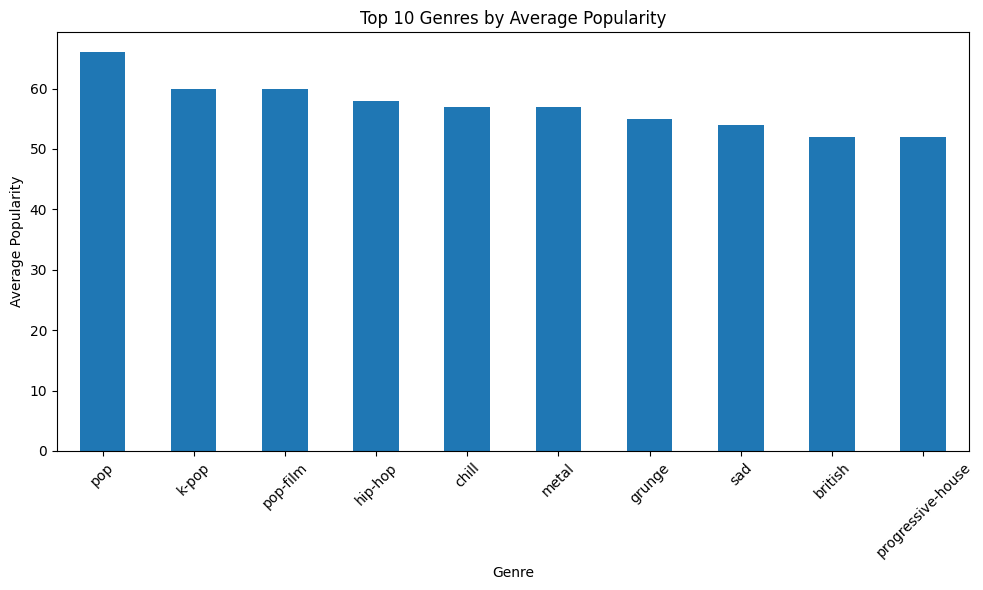

In [145]:
top_10_genre.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [146]:
df_cleaned

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.4130,135.960,4,world-music


Topic 2: Attributes Correlation

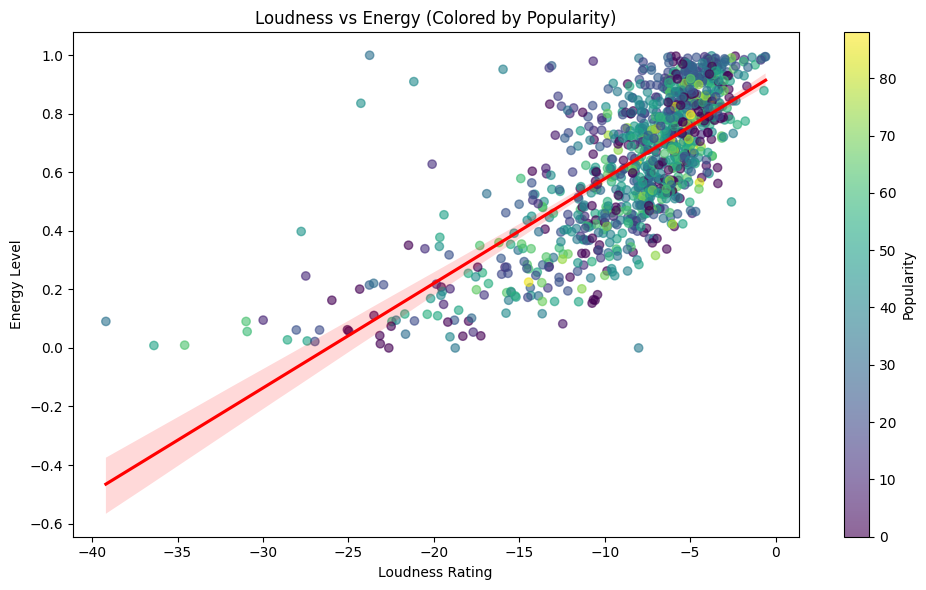

In [194]:
loudness_energy_df = df_cleaned[['loudness', 'energy', 'popularity']].sample(1000)
# fig, ax = plt.subplots(2,1)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=loudness_energy_df['loudness'],
    y=loudness_energy_df['energy'],
    c=loudness_energy_df['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=loudness_energy_df,
    x='loudness',
    y='energy',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Loudness Rating')
plt.ylabel('Energy Level')
plt.title('Loudness vs Energy (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

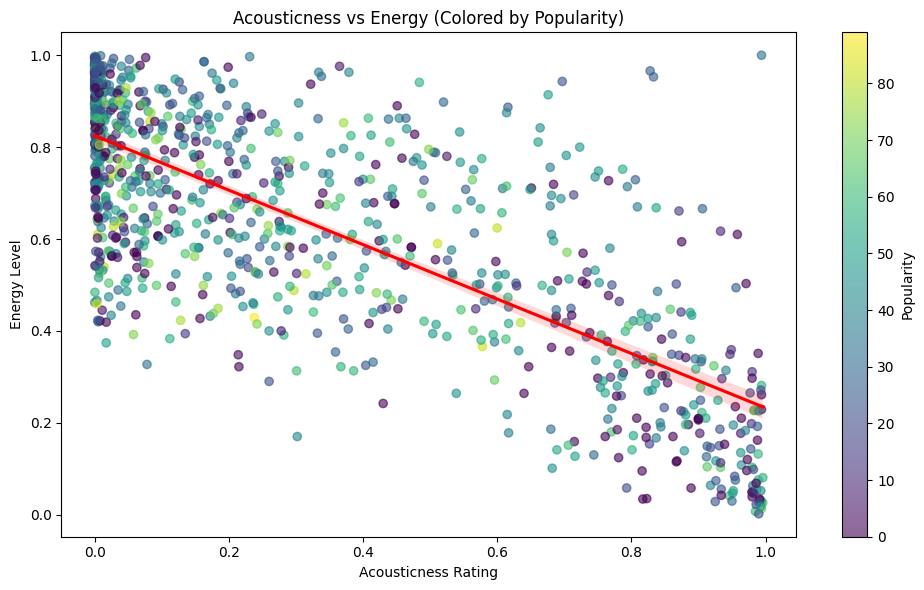

In [197]:
acousticness_energy_df = df_cleaned[['acousticness', 'energy', 'popularity']].sample(1000)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=acousticness_energy_df['acousticness'],
    y=acousticness_energy_df['energy'],
    c=acousticness_energy_df['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=acousticness_energy_df,
    x='acousticness',
    y='energy',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Acousticness Rating')
plt.ylabel('Energy Level')
plt.title('Acousticness vs Energy (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

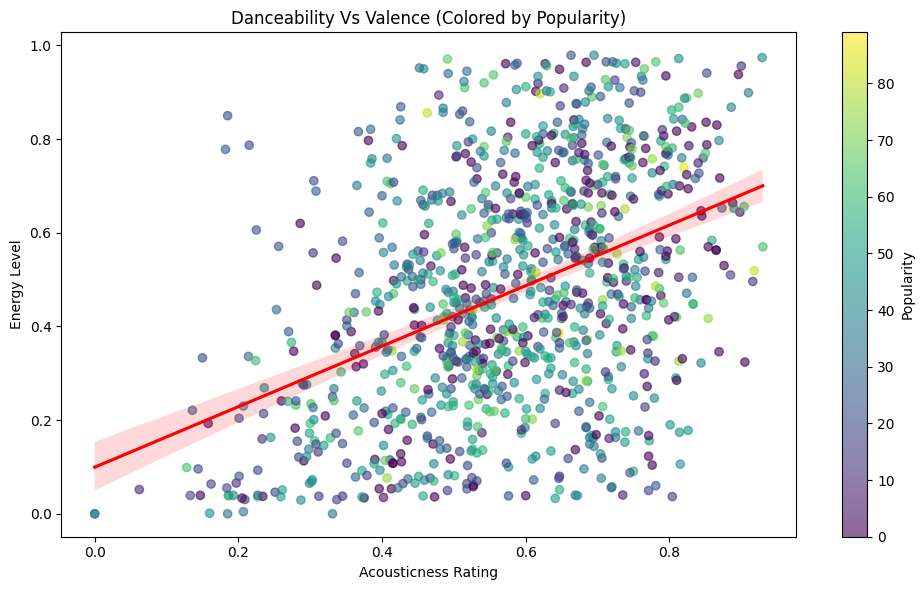

In [199]:
danceability_valence_df = df_cleaned[['danceability', 'valence', 'popularity']].sample(1000)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=danceability_valence_df['danceability'],
    y=danceability_valence_df['valence'],
    c=danceability_valence_df['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=danceability_valence_df,
    x='danceability',
    y='valence',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Acousticness Rating')
plt.ylabel('Energy Level')
plt.title('Danceability Vs Valence (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

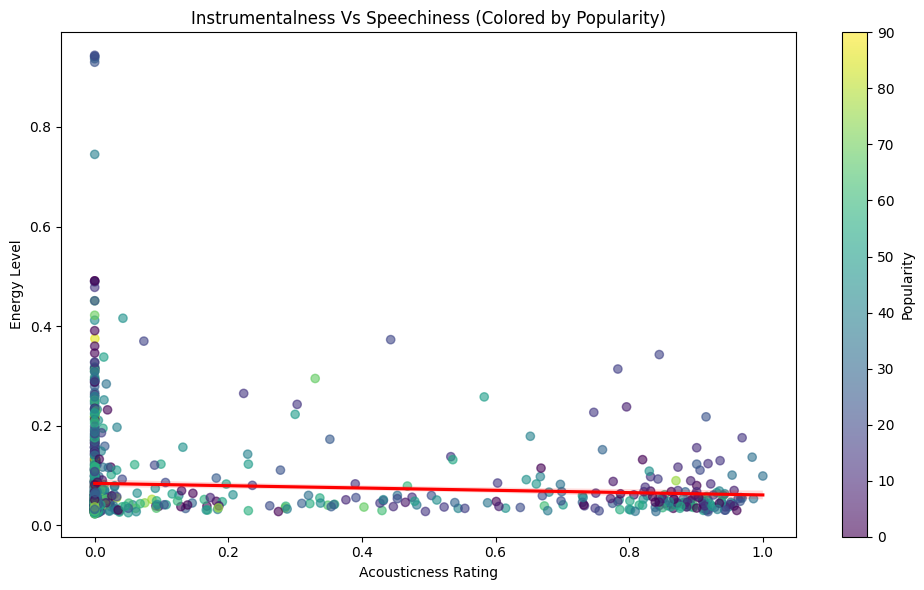

In [ ]:
instrumentalness_speechiness = df_cleaned[['instrumentalness', 'speechiness', 'popularity']].sample(1000)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=instrumentalness_speechiness['instrumentalness'],
    y=instrumentalness_speechiness['speechiness'],
    c=instrumentalness_speechiness['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=instrumentalness_speechiness,
    x='instrumentalness',
    y='speechiness',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Acousticness Rating')
plt.ylabel('Energy Level')
plt.title('Instrumentalness Vs Speechiness (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

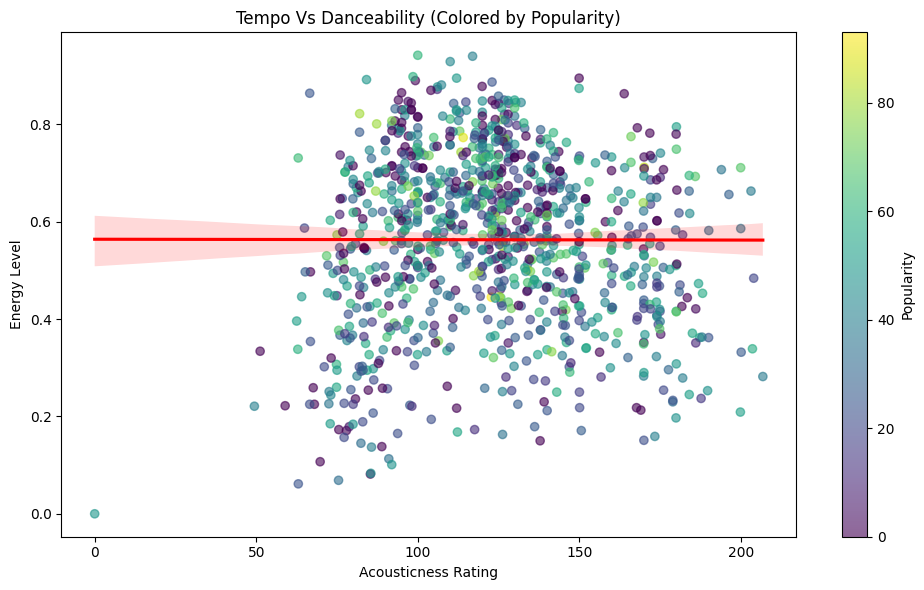

In [207]:
tempo_danceability_df = df_cleaned[['tempo', 'danceability', 'popularity']].sample(1000)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=tempo_danceability_df['tempo'],
    y=tempo_danceability_df['danceability'],
    c=tempo_danceability_df['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=tempo_danceability_df,
    x='tempo',
    y='danceability',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Acousticness Rating')
plt.ylabel('Energy Level')
plt.title('Tempo Vs Danceability (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

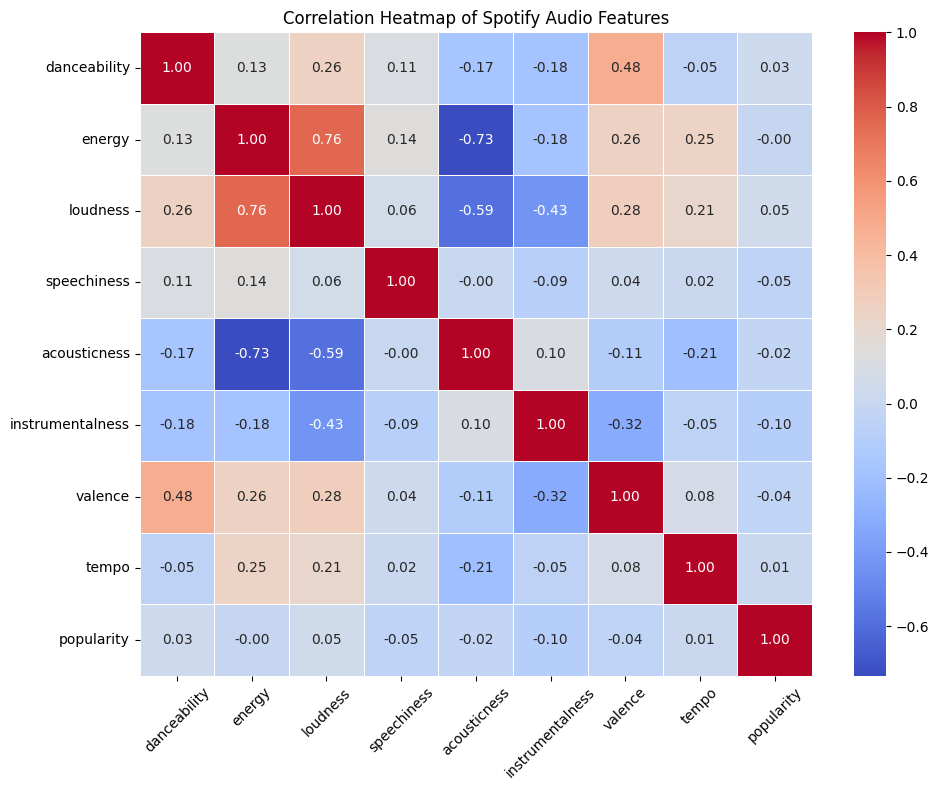

In [209]:
# Select only numerical audio features
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'valence', 'tempo', 'popularity'
]
# Compute correlation matrix
corr_matrix = df_cleaned[audio_features].corr()
# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Spotify Audio Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
